In [20]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)

In [21]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [22]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
noise = 0.01 * nd.random_normal(shape=(num_examples,))
y = real_fn(X) + noise


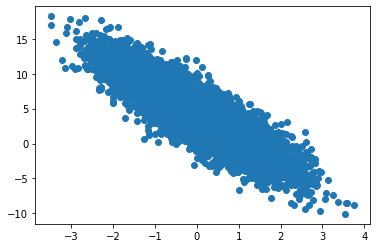

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1].asnumpy(),y.asnumpy())
plt.show()

In [24]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                  batch_size=batch_size, shuffle=True)

In [25]:
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

In [26]:
square_loss = gluon.loss.L2Loss()

In [27]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.0001})

In [28]:
epochs = 10
loss_sequence = []
num_batches = num_examples / batch_size

for e in range(epochs):
   cumulative_loss = 0
   # inner loop
   for i, (data, label) in enumerate(train_data):
       data = data.as_in_context(model_ctx)
       label = label.as_in_context(model_ctx)
       with autograd.record():
           output = net(data)
           loss = square_loss(output, label)
       loss.backward()
       trainer.step(batch_size)
       cumulative_loss += nd.mean(loss).asscalar()
   print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
   loss_sequence.append(cumulative_loss)

Epoch 0, loss: 4.832858179180324
Epoch 1, loss: 2.9207317620143294
Epoch 2, loss: 1.7651969958409668
Epoch 3, loss: 1.066860346172005
Epoch 4, loss: 0.6448143870722503
Epoch 5, loss: 0.38974142527207734
Epoch 6, loss: 0.23557862400580198
Epoch 7, loss: 0.14240102198654786
Epoch 8, loss: 0.08608174092285335
Epoch 9, loss: 0.052039991596224716


Text(0, 0.5, 'average loss')

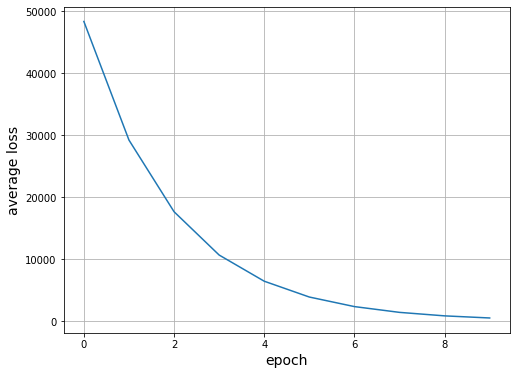

In [29]:
# plot the convergence of the estimated loss function
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)

In [30]:
params = net.collect_params() # this returns a ParameterDict
print('The type of "params" is a ',type(params))
# A ParameterDict is a dictionary of Parameter class objects
# therefore, here is how we can read off the parameters from it.
for param in params.values():
   print(param.name,param.data())


The type of "params" is a  <class 'mxnet.gluon.parameter.ParameterDict'>
dense2_weight 
[[ 1.7965343 -2.9873164]]
<NDArray 1x2 @cpu(0)>
dense2_bias 
[3.8736124]
<NDArray 1 @cpu(0)>
